# Pandas Query

Il metodo query() di pandas permette di filtrare i dati di un DataFrame usando una sintassi simile a quella SQL (Structured Query Language, linguaggio usato per interagire coi database), semplice e leggibile.

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Carica il dataset
dataset = load_dataset("yiqing111/Engineering_Jobs_Insight_Dataset")
# Converte in DataFrame Pandas
df = dataset['train'].to_pandas()
# Rimpiazza gli spazi con l'underscore
df.columns = df.columns.str.replace(' ', '_')
# Convertire 'Date_Posted' in datetime senza specificare il formato esatto
df['Date_Posted'] = pd.to_datetime(df['Date_Posted'], errors='coerce')


Repo card metadata block was not found. Setting CardData to empty.


In [2]:
df.head(5)

,Job_Title,Company,Description,Location,Salary_Min,Salary_Max,Date_Posted,URL
0,Senior Software Engineer (Python),BP Energy,Entity: Trading & Shipping Job Family Group: S...,"Crestwood, Houston",138992.40,138992.40,2024-10-29 16:35:26+00:00,https://www.adzuna.com/land/ad/4917931721?se=N...
1,Sr. Backend Software Engineer,Meijer,"As a family company, we serve people and commu...","Belmont, Kent County",118638.80,118638.80,2024-11-10 01:13:11+00:00,https://www.adzuna.com/land/ad/4933370156?se=N...
2,Sr. Software Engineer - Mobile,Meijer,"As a family company, we serve people and commu...","Belmont, Kent County",108041.95,108041.95,2024-10-15 11:51:30+00:00,https://www.adzuna.com/land/ad/4902683574?se=N...
3,Acquisition Software Engineer,Naval Air Systems Command,Position Description The Harpoon/SLAM ER/JSOW ...,"China Lake, Kern County",88583.57,88583.57,2024-11-16 04:21:41+00:00,https://www.adzuna.com/land/ad/4941260438?se=N...
4,Senior Software Engineer,Innova,A client of Innova Solutions is immediately hi...,"Richardson, Dallas",121932.35,121932.35,2024-11-15 09:42:55+00:00,https://www.adzuna.com/details/4940271538?utm_...


Mostrami gli stipendi minimi maggiori di 400000

In [3]:
df.query("Salary_Min > 400000")

,Job_Title,Company,Description,Location,Salary_Min,Salary_Max,Date_Posted,URL
514,Embedded Software Engineer,Rise Technical Recruitment,"Embedded Software Engineer Dallas, Texas (On-s...","Dallas, Texas",401000.0,401000.0,2024-11-06 11:26:37+00:00,https://www.adzuna.com/details/4928490623?utm_...
3187,"SVP, Engineering, Discovery & AI",Tubi,Tubi is a global entertainment company and the...,US,550000.0,600000.0,2024-11-08 05:08:00+00:00,https://www.adzuna.com/details/4931162311?utm_...
5808,Technology Strategy and Execution - Business A...,405190-Hire Us,Description Delivering high-quality and timely...,"Jersey City, Hudson County",411459.0,768667.0,2024-08-01 05:08:52+00:00,https://www.adzuna.com/details/4804447413?utm_...
10103,Lead Infrastructure Engineer - DMZ Network Eng...,405190-Hire Us,Description Assume a vital position as a key m...,"Jersey City, Hudson County",411459.0,748438.0,2024-08-11 06:45:01+00:00,https://www.adzuna.com/details/4821044847?utm_...


# Pandas `melt()`

Il metodo melt() di pandas serve per trasformare un DataFrame "largo" in uno "lungo" — cioè passare da colonne multiple a due colonne: una con i nomi delle variabili e una con i valori.


In [5]:
df_short = pd.DataFrame({
    'Data': ['2024-01', '2024-02'],
    'A': [100, 150],
    'B': [120, 130]
})
df_short

,Data,A,B
0,2024-01,100,120
1,2024-02,150,130


In [6]:
df_short.melt(id_vars = 'Data', var_name = 'Prodotto', value_name = 'Vendite')

,Data,Prodotto,Vendite
0,2024-01,A,100
1,2024-02,A,150
2,2024-01,B,120
3,2024-02,B,130


# Pandas Index Management

## Proprietà dell'indice

* Puoi ottenere o impostare le proprietà dell'indice, come il suo nome o il tipo di dato.  
* È utile per mantenere i metadati o garantire la compatibilità dell'indice nelle operazioni.
* `(index.name, index.dtype)`
    * `index.name` - nome dell'indice
    * `index.dtype` - tipo di dato dell'indice


In [7]:
df.sample(3)

,Job_Title,Company,Description,Location,Salary_Min,Salary_Max,Date_Posted,URL
7980,Sr Salesforce Marketing Cloud Engineer - AXS,AEG Presents LLC,AXS connects fans with the artists and teams t...,"Textile Finance, Los Angeles County",104434.21,104434.21,2024-10-22 14:20:26+00:00,https://www.adzuna.com/details/4910516599?utm_...
9042,Technical Security Engineer Secure App Dev,Bering Straits Native Corporation,"Summary Bering Global Solutions, a subsidiary ...","Rosslyn, Arlington County",118773.40,118773.40,2024-11-09 13:12:38+00:00,https://www.adzuna.com/details/4932971715?utm_...
8866,Mid Cloud Security Engineer (ADV0008ZJ) A,Aerodyne Industries,Aerodyne Industries Job Description: Position ...,"Huntsville, Madison County",133973.47,133973.47,2024-11-06 04:57:04+00:00,https://www.adzuna.com/land/ad/4928175135?se=2...


In [8]:
df.index

RangeIndex(start=0, stop=11185, step=1)

In [9]:
df.index.dtype

dtype('int64')

Il nostro indice è un intervallo di numeri, stiamo ispezionando il nome...

In [10]:
df.index.name

L'indice non ha un nome, possiamo darglielo

In [11]:
df.index.name = 'job_index'

In [12]:
df.index.name

'job_index'

In [13]:
df.sample(3)

,Job_Title,Company,Description,Location,Salary_Min,Salary_Max,Date_Posted,URL
job_index,,,,,,,,
6768,Product Analyst,FXI,Building our Future Together. FXI is a leading...,"Bridgewater Farms, Delaware County",70581.95,70581.95,2024-09-18 11:32:30+00:00,https://www.adzuna.com/details/4868162703?utm_...
1447,Staff Software Engineer,YUM! Restaurant Services Group,Description We love pizza. We eat it a lot. Th...,"Plano, Collin County",125118.04,125118.04,2024-10-10 06:50:47+00:00,https://www.adzuna.com/details/4897278847?utm_...
48,Real-Time Software Engineer,Boeing,The successful candidate will enjoy working in...,"Jersey City, Hudson County",90424.41,90424.41,2024-02-29 18:56:42+00:00,https://www.adzuna.com/land/ad/4586965074?se=a...


### Esempio 2

Ricordi la tabella pivot che abbiamo creato nell'ultimo esempio? Quella in cui abbiamo ottenuto gli stipendi  minimi mediani annuali per i diversi titoli di lavoro. Eseguiamo di nuovo quel codice. Poi otterremo il nome dell'indice e il tipo di dato dell'indice usando `df.index.name` e `df.index.dtype`.


In [14]:
median_pivot = df.pivot_table(values='Salary_Min', index='Job_Title',aggfunc='median')
median_pivot

,Salary_Min
Job_Title,
Developer,116729.88
"(Hybrid) Algorithms/Video Engineer/AI/ML tech , Deep Learning framework/",116253.39
"(Marketing) Front End Developer, Full-Time, Marlboro, Hybrid",82348.70
(USA) Product Manager III,90000.00
(f2pool) DevOps Engineer,130000.00
...,...
Zuora - Solution Architect - Manager,129817.80
eCommerce Product Manager,120000.00
iOS Software Engineer,130000.00


In [15]:
index_name = median_pivot.index.name  
index_name 

'Job_Title'

In [16]:
index_dtype = median_pivot.index.dtype  
index_dtype

dtype('O')

## reset_index()

* `reset_index()`: Reimposta l'indice del DataFrame al valore predefinito (intero). Questo è particolarmente utile dopo operazioni che modificano l'indice, come l'ordinamento o il filtraggio, per semplificare ulteriori manipolazioni dei dati.


### Esempio 1

Quando creiamo nuovi DataFrame filtrando, l'indice viene incasinato!


In [17]:
df_usa = df[df['Location'] == 'US']

df_usa.head(5)

,Job_Title,Company,Description,Location,Salary_Min,Salary_Max,Date_Posted,URL
job_index,,,,,,,,
393,Software Engineer Team Lead - Remote,Springbrook Holding Company LLC,Why Springbrook: Springbrook Software is the l...,US,91497.64,91497.64,2024-11-21 11:52:43+00:00,https://www.adzuna.com/land/ad/4946856988?se=P...
407,Software Engineer,Broadlume,"Software Engineer at Adhawk, Inc. d/b/a Broadl...",US,123656.00,123656.00,2024-10-18 11:48:16+00:00,https://www.adzuna.com/details/4906462757?utm_...
425,Software Engineer,Multi Media LLC,"About Multi Media, LLC Empower content creator...",US,120000.00,165000.00,2024-09-24 15:50:16+00:00,https://www.adzuna.com/details/4874939244?utm_...
436,Senior Software Engineer,Tech Firefly,Tech Firefly is teaming up with a deep learnin...,US,170000.00,220000.00,2024-03-01 16:23:33+00:00,https://www.adzuna.com/details/4588945381?utm_...
442,Senior Software Engineer,VAST Data,VAST Data is looking for a Senior Software Eng...,US,147272.47,147272.47,2023-02-14 22:18:14+00:00,https://www.adzuna.com/details/3926122028?utm_...


In [18]:
df_usa.index

Index([  393,   407,   425,   436,   442,   443,   444,   446,   456,   458,
       ...
       11147, 11154, 11162, 11167, 11169, 11174, 11177, 11178, 11183, 11184],
      dtype='int64', name='job_index', length=1341)

L'indice non è più correttamente incrementato di 1.

In [19]:
df_usa.reset_index(inplace=True)
df_usa.head()

,job_index,Job_Title,Company,Description,Location,Salary_Min,Salary_Max,Date_Posted,URL
0,393,Software Engineer Team Lead - Remote,Springbrook Holding Company LLC,Why Springbrook: Springbrook Software is the l...,US,91497.64,91497.64,2024-11-21 11:52:43+00:00,https://www.adzuna.com/land/ad/4946856988?se=P...
1,407,Software Engineer,Broadlume,"Software Engineer at Adhawk, Inc. d/b/a Broadl...",US,123656.00,123656.00,2024-10-18 11:48:16+00:00,https://www.adzuna.com/details/4906462757?utm_...
2,425,Software Engineer,Multi Media LLC,"About Multi Media, LLC Empower content creator...",US,120000.00,165000.00,2024-09-24 15:50:16+00:00,https://www.adzuna.com/details/4874939244?utm_...
3,436,Senior Software Engineer,Tech Firefly,Tech Firefly is teaming up with a deep learnin...,US,170000.00,220000.00,2024-03-01 16:23:33+00:00,https://www.adzuna.com/details/4588945381?utm_...
4,442,Senior Software Engineer,VAST Data,VAST Data is looking for a Senior Software Eng...,US,147272.47,147272.47,2023-02-14 22:18:14+00:00,https://www.adzuna.com/details/3926122028?utm_...


Tecnicamente potremmo usare `.drop()` per eliminare `job_index`.

MA, se in futuro volessimo eseguire operazioni di merge con il nostro DataFrame originale, questo fornisce l'`id` univoco per farlo.

### Esempio 2

Torniamo al nostro DataFrame principale con le offerte di lavoro. Andremo effettivamente a reimpostare gli indici nella tabella pivot così che `Job_Title` non sia più l'indice.


In [20]:
median_pivot.reset_index(inplace=True)
median_pivot

,Job_Title,Salary_Min
0,Developer,116729.88
1,(Hybrid) Algorithms/Video Engineer/AI/ML tech ...,116253.39
2,"(Marketing) Front End Developer, Full-Time, Ma...",82348.70
3,(USA) Product Manager III,90000.00
4,(f2pool) DevOps Engineer,130000.00
...,...,...
4843,Zuora - Solution Architect - Manager,129817.80
4844,eCommerce Product Manager,120000.00
4845,iOS Software Engineer,130000.00
4846,racle Cloud Financials Solution Architect,114549.44


## set_index()

* `set_index()`: Imposta una o più colonne esistenti come indice del DataFrame. Questo è utile per dati temporali (timeseries) o quando si vuole indicizzare in base a specifici attributi.


### Esempio 1

E se volessimo tornare a usare `job_index` come indice principale?


In [21]:
df_usa.head()

,job_index,Job_Title,Company,Description,Location,Salary_Min,Salary_Max,Date_Posted,URL
0,393,Software Engineer Team Lead - Remote,Springbrook Holding Company LLC,Why Springbrook: Springbrook Software is the l...,US,91497.64,91497.64,2024-11-21 11:52:43+00:00,https://www.adzuna.com/land/ad/4946856988?se=P...
1,407,Software Engineer,Broadlume,"Software Engineer at Adhawk, Inc. d/b/a Broadl...",US,123656.00,123656.00,2024-10-18 11:48:16+00:00,https://www.adzuna.com/details/4906462757?utm_...
2,425,Software Engineer,Multi Media LLC,"About Multi Media, LLC Empower content creator...",US,120000.00,165000.00,2024-09-24 15:50:16+00:00,https://www.adzuna.com/details/4874939244?utm_...
3,436,Senior Software Engineer,Tech Firefly,Tech Firefly is teaming up with a deep learnin...,US,170000.00,220000.00,2024-03-01 16:23:33+00:00,https://www.adzuna.com/details/4588945381?utm_...
4,442,Senior Software Engineer,VAST Data,VAST Data is looking for a Senior Software Eng...,US,147272.47,147272.47,2023-02-14 22:18:14+00:00,https://www.adzuna.com/details/3926122028?utm_...


In [22]:
df_usa.set_index('job_index', inplace=True)

df_usa.head()

,Job_Title,Company,Description,Location,Salary_Min,Salary_Max,Date_Posted,URL
job_index,,,,,,,,
393,Software Engineer Team Lead - Remote,Springbrook Holding Company LLC,Why Springbrook: Springbrook Software is the l...,US,91497.64,91497.64,2024-11-21 11:52:43+00:00,https://www.adzuna.com/land/ad/4946856988?se=P...
407,Software Engineer,Broadlume,"Software Engineer at Adhawk, Inc. d/b/a Broadl...",US,123656.00,123656.00,2024-10-18 11:48:16+00:00,https://www.adzuna.com/details/4906462757?utm_...
425,Software Engineer,Multi Media LLC,"About Multi Media, LLC Empower content creator...",US,120000.00,165000.00,2024-09-24 15:50:16+00:00,https://www.adzuna.com/details/4874939244?utm_...
436,Senior Software Engineer,Tech Firefly,Tech Firefly is teaming up with a deep learnin...,US,170000.00,220000.00,2024-03-01 16:23:33+00:00,https://www.adzuna.com/details/4588945381?utm_...
442,Senior Software Engineer,VAST Data,VAST Data is looking for a Senior Software Eng...,US,147272.47,147272.47,2023-02-14 22:18:14+00:00,https://www.adzuna.com/details/3926122028?utm_...


### Esempio 2

Ora che abbiamo reimpostato il nostro indice, possiamo impostare un nuovo indice su un'altra colonna come `Job_Title`.


In [23]:
median_pivot.set_index('Job_Title', inplace=True)
median_pivot

,Salary_Min
Job_Title,
Developer,116729.88
"(Hybrid) Algorithms/Video Engineer/AI/ML tech , Deep Learning framework/",116253.39
"(Marketing) Front End Developer, Full-Time, Marlboro, Hybrid",82348.70
(USA) Product Manager III,90000.00
(f2pool) DevOps Engineer,130000.00
...,...
Zuora - Solution Architect - Manager,129817.80
eCommerce Product Manager,120000.00
iOS Software Engineer,130000.00


## sort_index()


* `sort_index()`: Ordina il DataFrame in base all'indice (etichette delle righe), in ordine crescente o decrescente. Questo aiuta a organizzare rapidamente i dati per indice ed è spesso usato dopo `set_index()`.


### Esempio

Torniamo al nostro DataFrame pivotato e ordiniamo alfabeticamente questo nuovo indice.

In [25]:
median_pivot.sort_index(inplace=True)
median_pivot.head(30)

,Salary_Min
Job_Title,
Developer,116729.880
"(Hybrid) Algorithms/Video Engineer/AI/ML tech , Deep Learning framework/",116253.390
"(Marketing) Front End Developer, Full-Time, Marlboro, Hybrid",82348.700
(USA) Product Manager III,90000.000
(f2pool) DevOps Engineer,130000.000
.Full Stack NET developer,169387.720
.NET Back-End Developer,78459.520
.NET Developer - Full Stack,78049.580
.NET Full Stack Developer,119073.490


# Pandas Merge DataFrames

* `merge()`: Combina DataFrame basandosi su colonne o indici comuni
* Unisce le righe dei DataFrame in base a chiavi specifiche.

## Esempi


Dobbiamo combinare due DataFrame:
- `df_jobs` contiene informazioni simili al nostro DataFrame `df`
- `df_companies` contiene informazioni sulle aziende


In [32]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [27]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [28]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [33]:
# Merge the two datasets on the 'job_id' column
df_job_company = df_jobs.merge(df_companies, on='company_name')

df_job_company

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


Mergiamo due data frame riguardo a quando sono richiesti mensilmente i lavori

In [34]:
import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (11000, 15000),
    'Back-End Developer': (8000, 10000),
    'Full-Stack Developer': (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_software_pivot = pd.DataFrame(data, index=months)
df_US_software_pivot.index.name = "job_posted_month"

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [35]:
import random

# Set seed for reproducibility
random.seed(12)

# Define job titles
job_titles =  ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Data Scientist': (9000, 11000),
    'Software Engineer': (8000, 10000),
    'Product Manager': (10000, 13000),
    'Marketing Director': (11000, 15000),
    'HR Manager':(14000, 18000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_data_pivot = pd.DataFrame(data, index=months)
df_US_data_pivot.index.name = "job_posted_month"

df_US_data_pivot

,Data Scientist,Software Engineer,Product Manager,Marketing Director,HR Manager
job_posted_month,,,,,
January,9971,9317,11802,13791,14914
February,9550,9659,11505,12657,14372
March,10346,8942,10664,14268,15735
April,10083,9414,11391,14450,17877
May,10364,9770,10861,11357,15817
June,9716,9231,10240,11076,14460
July,9292,8466,12360,14763,16706
August,9781,9143,10817,11248,15733
September,9022,8003,10305,14357,17978


Combiniamoli usando merge:

In [36]:
df_US_merged = df_US_data_pivot.merge(df_US_software_pivot, on='job_posted_month')
df_US_merged

,Data Scientist,Software Engineer,Product Manager,Marketing Director,HR Manager,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,
January,9971,9317,11802,13791,14914,13619,9827,5108,4348
February,9550,9659,11505,12657,14372,11456,9116,7298,4284
March,10346,8942,10664,14268,15735,11102,8178,5814,4159
April,10083,9414,11391,14450,17877,14037,9209,7232,4220
May,10364,9770,10861,11357,15817,12126,8864,6718,4980
June,9716,9231,10240,11076,14460,12003,8065,5902,4781
July,9292,8466,12360,14763,16706,11914,8061,6839,4344
August,9781,9143,10817,11248,15733,11571,8191,7413,4104
September,9022,8003,10305,14357,17978,14016,8447,6139,4094


In [37]:
# prendiamo i primi 5
top_5 = df_US_merged.sum().sort_values(ascending=False).head(5).index

top_5 = top_5.tolist()

top_5


['HR Manager',
 'Marketing Director',
 'Front-End Developer',
 'Product Manager',
 'Data Scientist']

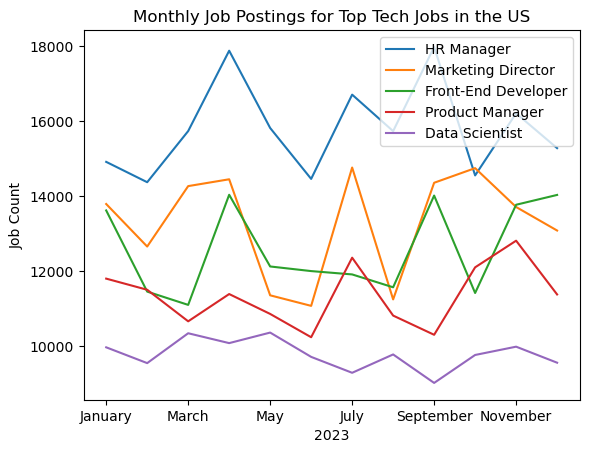

In [38]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

# Pandas Concat DataFrames

* `concat()`: Combina DataFrame per righe (`axis=0`) o per colonne (`axis=1`).
* Unisce i DataFrame senza usare chiavi.

### Esempio 1

Questo è un semplice DataFrame con dati di due offerte di lavoro. La prima è di gennaio, la seconda di febbraio. Useremo `concat()` per concatenare questi due DataFrame.


In [39]:
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})

job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [40]:
# Dataset di esempio con offerte di lavoro a febbraio  
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


In [41]:
# Concatenare i due DataFrame
# Di default axis = 0
job_postings_combined = pd.concat([job_postings_jan, job_postings_feb], ignore_index=True)

job_postings_combined

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


# Pandas Exporting Data

* `to_csv()`: Esporta il DataFrame in un file CSV.  
* `to_excel()`: Esporta il DataFrame in un file Excel.  
* `to_sql()`: Esporta il DataFrame in un database SQL.  
* `to_parquet()`: Esporta il DataFrame in un file Parquet.  
    * Parquet è un formato di archiviazione colonnare progettato per uno storage e un recupero efficienti dei dati.

Per prima cosa, esportiamo il nostro file in un **file CSV**.  
Spesso può essere necessario esportare e importare dati da e verso i DataFrame in formato CSV, soprattutto quando si vuole **pulire i dati** prima di utilizzarli in altri strumenti di visualizzazione.


In [43]:
# Saving the DataFrame to a CSV file
df.to_csv('data/jobs_data.csv', index=False)

In [44]:
help(df.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None, *, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'str | Callable | None' = None, columns: 'Sequence[Hashable] | None' = None, header: 'bool_t | list[str]' = True, index: 'bool_t' = True, index_label: 'IndexLabel | None' = None, mode: 'str' = 'w', encoding: 'str | None' = None, compression: 'CompressionOptions' = 'infer', quoting: 'int | None' = None, quotechar: 'str' = '"', lineterminator: 'str | None' = None, chunksize: 'int | None' = None, date_format: 'str | None' = None, doublequote: 'bool_t' = True, escapechar: 'str | None' = None, decimal: 'str' = '.', errors: 'OpenFileErrors' = 'strict', storage_options: 'StorageOptions | None' = None) -> 'str | None' method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.

    Parameters
    ----------
    path_or_buf : str, path object, file-like object

Un altro formato molto usato per l'esportazione, soprattutto per i tuoi amici che non usano il codice, è **Excel**.


In [45]:
# Saving the DataFrame to an Excel file
df.to_excel('jobs_data.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'

In [3]:
# Carica il dataset
dataset = load_dataset("yiqing111/Engineering_Jobs_Insight_Dataset")
# Converte in DataFrame Pandas
df = dataset['train'].to_pandas()
# Rimpiazza gli spazi con l'underscore
df.columns = df.columns.str.replace(' ', '_')
df.to_excel('data/jobs_data.xlsx', index=False)

Repo card metadata block was not found. Setting CardData to empty.


ModuleNotFoundError: No module named 'openpyxl'

Puoi esportare Dataframe in formato  **pickle file**.

Un file Pickle è un modo per salvare oggetti Python (come DataFrame, dizionari, liste, modelli ML, ecc.) su disco, in modo che possano essere ricaricati esattamente come erano.

In [ ]:
# Saving the DataFrame to a Pickle file
df.to_pickle('data/job_data.pkl')

# Pandas `apply()`

La funzione `apply()` permette di **applicare una funzione** personalizzata a **ciascuna colonna o riga** di un DataFrame, oppure a una **Serie**.

### Quando usarla

- Per eseguire **trasformazioni complesse**
- Per applicare **funzioni personalizzate**
- Quando il semplice `.map()` o operazioni vettoriali non bastano

---

### Sintassi base

```python
df.apply(funzione, axis=0)  # per colonne (default), lavora su tutte le righe di una colonna
df.apply(funzione, axis=1)  # per righe, lavora su tutte le colonne di una riga


### Esempio 1

Calcola gli stipendi previsti per il prossimo anno rispetto al salario minimo, usando un tasso ipotetico del 3,0% per tutti i ruoli.


In [ ]:
def inflation(salary):
    return salary * 1.03

df['salary_year_inflated'] = df['Salary_Min'].apply(inflation)

df[['Salary_Min', 'salary_year_inflated']]

In realtà possiamo semplificare questo usando una funzione lambda.

In [ ]:
df['salary_year_inflated'] = df['Salary_Min'].apply(lambda salary: salary * 1.03)

df[['Salary_Min', 'salary_year_inflated']]

Tecnicamente, questo si poteva anche fare così...

In [ ]:
df['salary_year_inflated'] = df['Salary_Min'] * 1.03

df[['Salary_Min', 'salary_year_inflated']]

### Example 2

Calcola gli stipendi previsti per il prossimo anno, ma:
- Per i ruoli senior 'Product Manager  Social app startup', considera un aumento del 400%
- Per tutti gli altri ruoli, considera un aumento del 3%


In [ ]:
def projected_salary(row):
    if 'Product Manager  Social app startup' in row['Job_Title']:
        return  4.0 * row['Salary_Min']
    else:
        return  1.03 * row['Salary_Min']

df['salary_year_inflated'] = df.apply(projected_salary, axis=1)

df[pd.notna(df['Salary_Min'])][['Job_Title', 'Salary_Min', 'salary_year_inflated']].sort_values(by='salary_year_inflated', ascending=False).head(30)

Tecnicamente potresti scriverlo con una funzione lambda, ci provi?

# Pandas Explode

* `explode()` - trasforma ogni elemento di tipo lista in una riga separata  
* Espande i dati di tipo lista all'interno di una colonna del DataFrame in righe distinte.  
* Usato spesso per analizzare dati contenuti in liste (*hint hint*) o quando si lavora con dati JSON in un DataFrame.


In [ ]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

Se volessimo analizzare le competenze in questo caso, ci servirebbero almeno 5 righe di codice per ottenere il conteggio delle skill.

In [ ]:
df_skill_lists = df_skills.copy()

for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)
        
df_skill_lists.loc['Total'] = df_skill_lists.sum()
    
df_skill_lists.iloc[:, 2:]

Tuttavia, esplodere i dati li rende molto più facili da gestire.

In [ ]:
df_exploded = df_skills.explode('job_skills')

df_exploded

Ora possiamo usare `value_counts` e persino creare un grafico.

In [ ]:
df_exploded.value_counts('job_skills')

In [ ]:
df_exploded.value_counts('job_skills').plot(kind='bar')